In [236]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling set up
fs = 200.0        # Hz
dt = 1./fs
T = 2.0           # seconds
N = int(fs * T)
t = np.arange(N) * dt
print (f"dt is {dt * 1e3} ms")
print (f"Frequency is {fs} Hz")
print (f"Number of sample is {N}")
print (f"Length of the time series is {T}s")

# Signal
f1, f2 = 5, 10
omega_1 = 2*np.pi*f1 
omega_2 = 2*np.pi*f2 
x = np.sin(omega_1*t) + 0.5*np.sin(2*omega_2*t)

# Add noise
rng = np.random.default_rng(0)
x += 0.2 * rng.standard_normal(N)

# FFT
X = np.fft.fft(x)
freq = np.fft.fftfreq(N, d=dt)

# # Amplitude spectrum
# amp = np.abs(X) / N

dt is 5.0 ms
Frequency is 200.0 Hz
Number of sample is 400
Length of the time series is 2.0s


In [255]:
x_inv = np.fft.ifft(X)

In [256]:
np.all(x==x_inv)

False

In [258]:
np.linalg.norm(x-x_inv)

4.195503625724787e-15

/Users/sgkang09/anaconda3/envs/em/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/sgkang09/anaconda3/envs/em/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


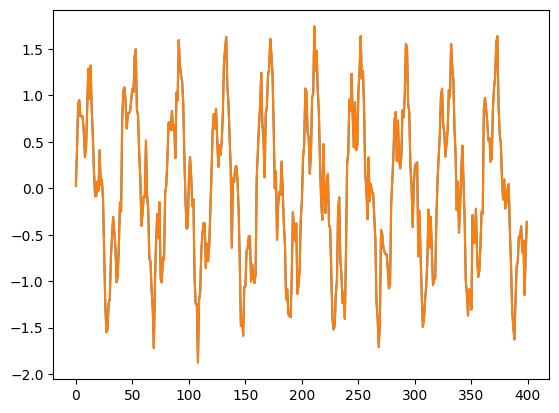

In [257]:
plt.plot(x)
plt.plot(x_inv)

In [239]:
f_nyquist = 1./ (2*dt)
f_nyquist

100.0

In [246]:
df = 1./T
freq_compute = np.r_[np.arange(int(N/2)) * df, np.arange(int(N/2)) * df-f_nyquist]

In [247]:
np.all(freq == freq_compute)

True

$$F(\omega) =\int_{\infty}^{\infty} f(t) exp (-i\omega t) d\omega$$

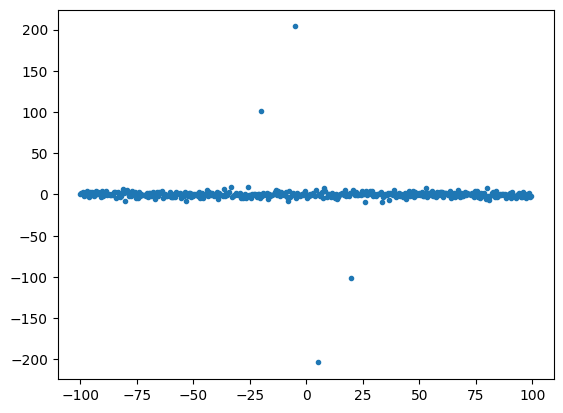

In [251]:
plt.plot(freq, X.imag, '.')

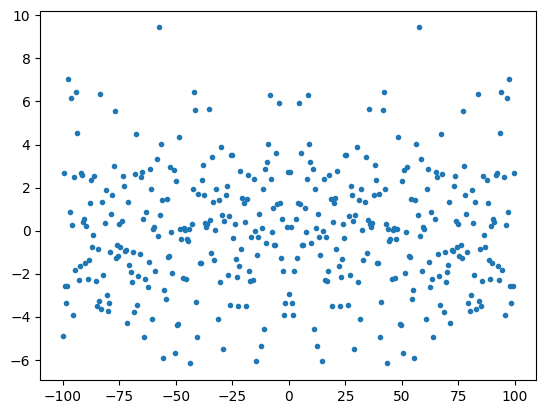

In [252]:
plt.plot(freq, X.real, '.')

In [253]:
np.random.seed(1)

In [260]:
# ============================================================
# 2) Convolution example: smoothing with a boxcar
#    Compare np.convolve (time domain) vs FFT-based
# ============================================================
# a signal with a sharp feature
x2 = np.zeros(N)
x2[N//3:N//3+5] = 1.0
x2 += 0.2*rng.standard_normal(N)
# plt.plot(x2)

In [262]:
# plt.plot(x2)

In [294]:
# boxcar kernel (moving average)
M = 21
h = np.ones(M) / M

# time-domain linear convolution (same length as x2)
y_time = np.convolve(x2, h, mode="same")
y_time_orig = np.convolve(x2, h)

# FFT-based linear convolution requires zero-padding to length >= N+M-1
L = N + M - 1
X2 = np.fft.fft(x2, n=L)
H  = np.fft.fft(h,  n=L)
y_full = np.fft.ifft(X2 * H)



# pick "same" segment (centered)
start = (M - 1) // 2
y_fft = y_full[start:start+N]


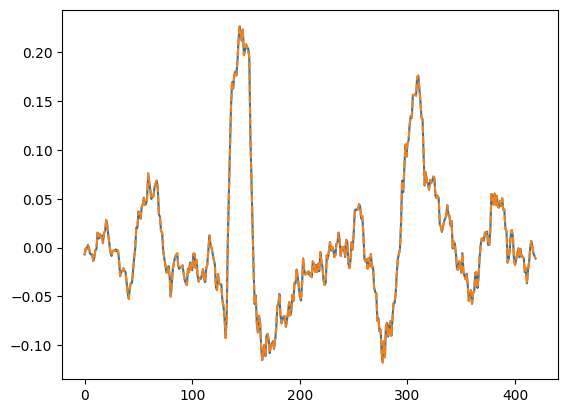

In [295]:
plt.plot(y_full)
plt.plot(y_time_orig, '--')

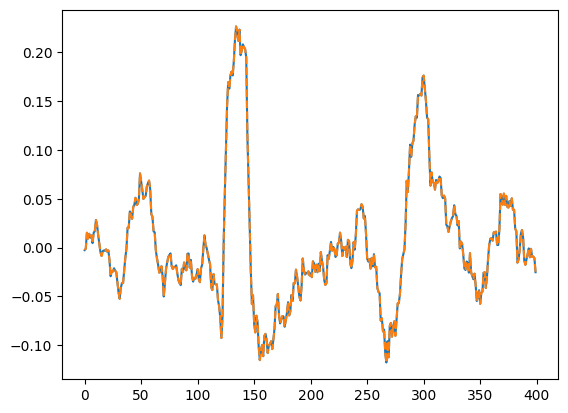

In [298]:
plt.plot(y_fft)
plt.plot(y_time, '--')

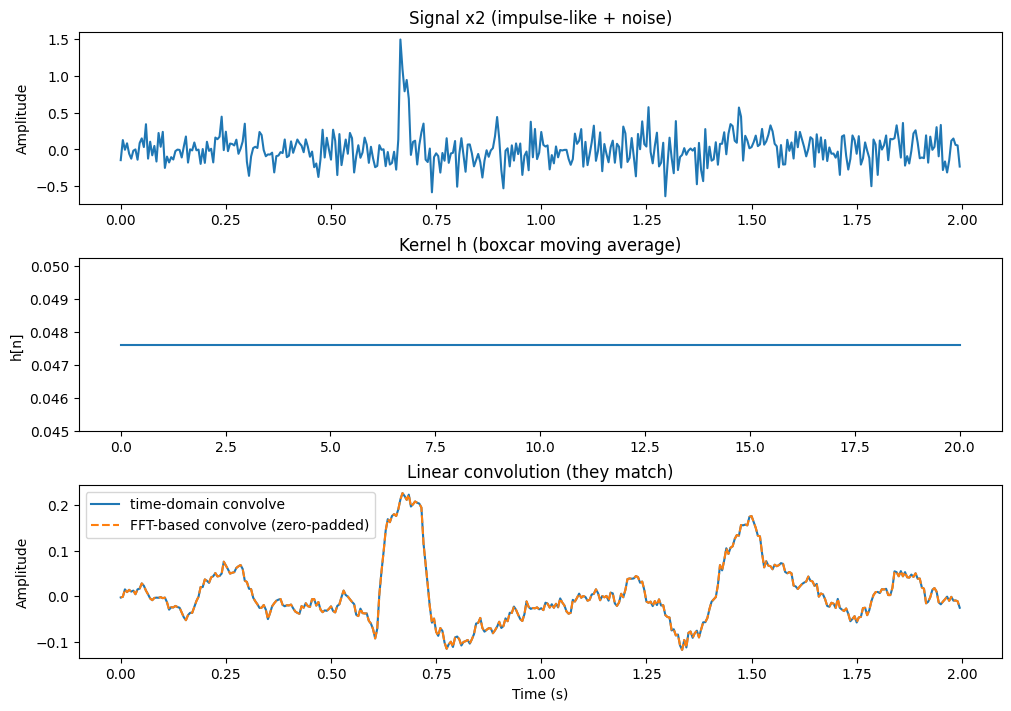

In [299]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7), constrained_layout=True)
axs[0].plot(t, x2)
axs[0].set_title("Signal x2 (impulse-like + noise)")
axs[0].set_ylabel("Amplitude")

axs[1].plot(np.arange(M), h)
axs[1].set_title("Kernel h (boxcar moving average)")
axs[1].set_ylabel("h[n]")

axs[2].plot(t, y_time, label="time-domain convolve")
axs[2].plot(t, y_fft, "--", label="FFT-based convolve (zero-padded)")
axs[2].set_title("Linear convolution (they match)")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Amplitude")
axs[2].legend()
plt.show()